# 目录
+ 获取数据集
+ 生成模拟数据集
+ 数据标准化
+ 将连续变量转化为二值类别变量
+ 对自变量中的类别变量进行独热编码
+ 对因变量中的类别变量进行one-vs-all编码
+ 填补缺失值
+ 使用Pipelines来进行多步骤的数据预处理
+ PCA降维
+ 因子分析降维
+ 核PCA非线性降维
+ 截尾SVD降维
+ 字典学习
+ 高阶Pipelines
+ 用高斯过程进行回归
+ 直接设置高斯过程
+ 回归问题中的随机梯度下降

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# 获取数据集
被导入的数据集在Python中被存储为**bunch**数据结构

In [3]:
from sklearn import datasets

## load方法
datasets.load_函数

In [4]:
boston = datasets.load_boston() # 该类数据集较小，随datasets模块被载入，load后就可以使用
print boston.DESCR # 查看对数据集的描述

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## fetch方法
datasets.fetch_函数

In [5]:
datasets.fetch_california_housing()

{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ..., 
        [   1.7       ,   17.        ,    

In [6]:
housing = datasets.fetch_california_housing() # 该类数据集较大，不随datasets模块载入，使用前需要从网络下载fetch
#print housing.DESCR # 查看对数据集的描述

In [7]:
# fetch方法的第一个参数为data_home，可以设置该数据集下载后的存储位置
datasets.get_data_home() # 查看fetch下来的数据集的默认存储位置

'C:\\Users\\31537\\scikit_learn_data'

In [8]:
X, y = boston.data, boston.target # 通过data和target属性，获取解释变量和被解释变量

其他的数据获得途径包括：UCI Machine Learning Repository、KDD、政府网站、Kaggle competitions等

# 生成模拟数据集

In [9]:
from sklearn import datasets

## make方法 

### 回归数据集
datasets.make_regression函数

In [10]:
reg_data = datasets.make_regression() # 产生一个元组：第1个元素为100*100的矩阵（100个样本、100个特征），其中10个特征有意义；第2个元素为被解释变量

In [11]:
reg_data[0].shape, reg_data[1].shape

((100L, 100L), (100L,))

In [12]:
complex_reg_data = datasets.make_regression(1000, 10, 5, 2, 1.0) # 生成1000*10的矩阵，5个特征有意义，偏误项为1.0，被解释变量为2维向量

In [13]:
complex_reg_data[0].shape, complex_reg_data[1].shape

((1000L, 10L), (1000L, 2L))

### 分类数据集
make_classification函数

In [14]:
classification_set = datasets.make_classification(weights=[0.1]) # 生成100*20的矩阵，2个特征有意义，2个类别
# weights参数，为了模拟现实情况，需要生成不平衡的分类数据集；参数为list形式，当list中元素个数为类别数-1，则自动计算最后一类的比例

In [15]:
np.bincount(classification_set[1]) # 0类有10个样本，1类有90个样本

array([10, 90], dtype=int64)

In [16]:
classification_set[0].shape

(100L, 20L)

### 聚类数据集
make_blobs函数

In [17]:
blobs, classes = datasets.make_blobs(500, centers=3) # 生成聚类数据集

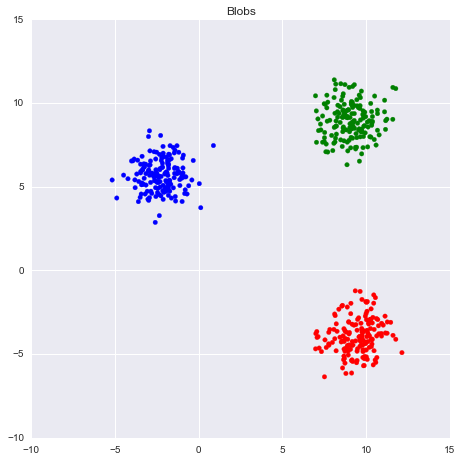

In [18]:
rgb = np.array(['r', 'g', 'b'])
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs"); # 绘制模拟生成的聚类数据集

### 源代码

# 数据标准化

In [19]:
from sklearn import preprocessing

## 将特征转化为标准正态分布
preprocessing.scale函数  
preprocessing.StandardScaler类

### 函数

In [20]:
X[:, :3].mean(axis=0) # boston数据集，前3个特征的均值

array([  3.59376071,  11.36363636,  11.13677866])

In [21]:
X[:, :3].std(axis=0) # 前3个特征的方差

array([  8.58828355,  23.29939569,   6.85357058])

In [22]:
X_2 = preprocessing.scale(X[:, :3]) # preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)，默认按特征将数据转化为标准状态分布

In [23]:
X_2.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [24]:
X_2.std(axis=0)

array([ 1.,  1.,  1.])

### 类

In [25]:
my_scaler = preprocessing.StandardScaler() # 生成StandardScaler类
my_scaler.fit(X[:, :3]) # 分别计算每个特征的均值、方差，并储存在实例中
my_scaler.transform(X[:, :3]).mean(axis=0) # 使用存储在实例中的均值、方差，将特征转化为标准正态分布

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [26]:
my_scaler_2 = preprocessing.StandardScaler() # 生成StandardScaler类
my_scaler_2.fit_transform(X[:, :3]).mean(axis=0) # fit_transform方法

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

## 将特征转化到一定区间内
preprocessing.minmax_scale函数  
preprocessing.MinMaxScaler类

In [27]:
my_minmax_scaler = preprocessing.MinMaxScaler() # 默认将数据转化到区间[0,1]
my_minmax_scaler.fit(X[:, :3])
my_minmax_scaler.transform(X[:, :3]).min(axis=0), my_minmax_scaler.transform(X[:, :3]).max(axis=0)

(array([ 0.,  0.,  0.]), array([ 1.,  1.,  1.]))

In [28]:
my_odd_scaler = preprocessing.MinMaxScaler(feature_range=(-3.14, 3.14)) # feature_range参数，设置转化的区间
my_odd_scaler.fit(X[:, :3])
my_odd_scaler.transform(X[:, :3]).min(axis=0), my_odd_scaler.transform(X[:, :3]).max(axis=0)

(array([-3.14, -3.14, -3.14]), array([ 3.14,  3.14,  3.14]))

## 将样本转化为模为1的向量
用欧氏距离来度量样本之间的距离时，需要先将样本规范化为模为1的向量  
preprocessing.normalize函数  
preprocessing.Normalizer类

In [29]:
normalized_X = preprocessing.normalize(X[:, :3]) # 每个样本由一个模为1的三维向量表示

## 幂等变换
意味着对数据变换N次，与变换1次的效果相同

In [30]:
my_useless_scaler = preprocessing.StandardScaler(with_mean=False, with_std=False) # 无论对数据变换多少次，返回的结果都与原数据相同 —— 幂等变换
transformed_sd = my_useless_scaler .fit_transform(X[:, :3]).std(axis=0)
original_sd = X[:, :3].std(axis=0)
np.array_equal(transformed_sd, original_sd) # 变换前后的数据一致

True

## 稀疏矩阵
稀疏矩阵中有大量的0元素，将稀疏矩阵转化为标准正态分布、转化到一定区间等操作，会使0元素不再为0，破坏数据的结构。因而无法对稀疏矩阵进行涉及到中心化、整体移动等让元素0不再为0的操作。

### 将特征转化为标准正态分布

In [31]:
matrix = scipy.sparse.eye(1000)

In [32]:
preprocessing.scale(matrix, with_mean=False) # 无法对稀疏矩阵中心化，因而只将数据的标准差转化为1

<1000x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

### 将特征转化到一定区间内

In [33]:
my_odd_scaler = preprocessing.MaxAbsScaler() # 将数据转化到[-1,1]区间内，不会整体移动数据，0元素依然为0
my_odd_scaler.fit(matrix)
my_odd_scaler.transform(matrix).max(axis=0)

<1x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 1000 stored elements in COOrdinate format>

### 将样本转化为模为1的向量

In [34]:
normalized_matrix = preprocessing.normalize(matrix) # 将样本转化为模为1的向量，仍然可以操作，因为元素0依然为0

# 将连续变量转化为二值类别变量
preprocessing.binarize函数  
preprocessing.Binarizer类

In [35]:
from sklearn import preprocessing
from sklearn import datasets
boston = datasets.load_boston()

## 函数

In [36]:
new_target = preprocessing.binarize(boston.target.reshape(-1, 1), threshold=boston.target.mean()) # 大于阈值的转化为1，小于等于阈值的转化为0
new_target[:5] # 在sklearn中，不能传入一维数组，所以boston.target需要reshape为二维数组

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [37]:
(boston.target[:5] > boston.target.mean()).astype(int) # 检查转化过程是否正确

array([1, 0, 1, 1, 1])

## 类

In [38]:
bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform(boston.target.reshape(-1, 1))
new_target[:5]

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.]])

## 稀疏矩阵
为了节省内存，稀疏矩阵中的0元素没有被存储。所以，在将稀疏矩阵转化为二值类别变量时，阈值不能小于0

In [39]:
from scipy.sparse import coo
spar = coo.coo_matrix(np.random.binomial(1, .25, 100))

## fit方法

In [40]:
bin = preprocessing.Binarizer(boston.target.mean()) # 不同于其他变化方法，这里参数是在生成实例的时候传入，而不是在fit方法中传入
new_target = bin.fit(boston.target.reshape(-1, 1)) # fit方法没有任何作用，仅仅返回实例本身；fit存在的意义是与其他方法保存一致，方便在pipelines中使用
new_target = bin.transform(boston.target.reshape(-1, 1))
new_target[:5]

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.]])

# 对自变量中的类别变量进行独热编码
OneHotEncoder类

In [41]:
from sklearn import preprocessing
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
d = np.column_stack((X, y))

In [42]:
text_encoder = preprocessing.OneHotEncoder()
text_encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [43]:
# text_encoder实例的transform方法可以重复使用，且转化规则由初次fit时决定
text_encoder.transform(np.ones((3, 1))).toarray()

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

# 对因变量中的类别变量进行one-vs-all编码
LabelBinarizer类

In [44]:
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets
iris = datasets.load_iris()
target = iris.target

In [45]:
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes']) # 因变量为两类别时，转化为0、1向量

array([[1],
       [0],
       [0],
       [1]])

In [46]:
label_binarizer = LabelBinarizer()
new_target = label_binarizer.fit_transform(target) # 因变量为多类别时，进行one-vs-all编码，矩阵的列数为类别数，每一列代表是否属于一个类别
new_target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [47]:
label_binarizer = LabelBinarizer(neg_label=-1000, pos_label=1000) # 默认用0、1编码，可以设置用其他数值编码
label_binarizer.fit_transform(target)[:5]

array([[ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000]])

# 填补缺失值
Imputer类

## Imputer类

In [48]:
from sklearn import preprocessing

In [49]:
# 生成缺失值数据集
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, .25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan
iris_X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ nan,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ nan,  3.1,  1.5,  nan],
       [ 5. ,  3.6,  1.4,  0.2]])

In [50]:
impute = preprocessing.Imputer() # 默认用均值填充缺失值
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 5.83425926,  3.        ,  1.4       ,  0.2       ],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 5.83425926,  3.1       ,  1.5       ,  1.18376068],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       ]])

In [51]:
impute = preprocessing.Imputer(strategy='median') # 用中位数填充缺失值
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 5.8,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 5.8,  3.1,  1.5,  1.3],
       [ 5. ,  3.6,  1.4,  0.2]])

In [52]:
impute = preprocessing.Imputer(strategy='most_frequent') # 用出现频率最高的数填充缺失值
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 5.7,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 5.7,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [53]:
iris_X[np.isnan(iris_X)] = -1 # 缺失值用-1而非np.nan表示
iris_X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [-1. ,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [-1. ,  3.1,  1.5, -1. ],
       [ 5. ,  3.6,  1.4,  0.2]])

In [54]:
impute = preprocessing.Imputer(missing_values=-1) # 指定-1为缺失值
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 5.83425926,  3.        ,  1.4       ,  0.2       ],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 5.83425926,  3.1       ,  1.5       ,  1.18376068],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       ]])

## fillna方法
相比之下，pandas中的fillna更为灵活，可以有多种填充策略

In [55]:
import pandas as pd
iris_X[masking_array] = np.nan
iris_df = pd.DataFrame(iris_X, columns=iris.feature_names)
iris_df.fillna(iris_df.mean())['sepal length (cm)'].head(5)

0    5.100000
1    5.834259
2    4.700000
3    5.834259
4    5.000000
Name: sepal length (cm), dtype: float64

In [56]:
iris_df.fillna(iris_df.max())['sepal length (cm)'].head(5)

0    5.1
1    7.9
2    4.7
3    7.9
4    5.0
Name: sepal length (cm), dtype: float64

# 使用Pipelines来进行多步骤的数据预处理
Pipelines类

In [57]:
# 生成缺失值数据集
from sklearn import datasets
import numpy as np
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1, .1, mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]

array([[ 0.89948373, -0.35970161, -0.60164287, -0.22025182],
       [-0.35970161,         nan,         nan,  0.09595104],
       [-0.60164287,  0.3699092 ,  1.13351475,  0.26084723],
       [-0.22025182,  0.09595104,  0.26084723,  0.73890955]])

## 不用Pipelines处理

In [58]:
from sklearn import preprocessing

In [59]:
impute = preprocessing.Imputer()
scaler = preprocessing.StandardScaler()
mat_imputed = impute.fit_transform(mat)
mat_imputed[:4, :4]

array([[ 0.89948373, -0.35970161, -0.60164287, -0.22025182],
       [-0.35970161, -0.3564242 , -0.30783107,  0.09595104],
       [-0.60164287,  0.3699092 ,  1.13351475,  0.26084723],
       [-0.22025182,  0.09595104,  0.26084723,  0.73890955]])

In [60]:
mat_imp_and_scaled = scaler.fit_transform(mat_imputed)
mat_imp_and_scaled[:4, :4]

array([[ 1.51375048, -0.00692814, -0.35367165, -0.26452293],
       [-0.93354646,  0.        ,  0.        ,  0.46714336],
       [-1.40377278,  1.53539908,  1.7349989 ,  0.84869899],
       [-0.662518  ,  0.95627784,  0.68453817,  1.9548942 ]])

## 使用Pipelines处理

In [61]:
from sklearn import pipeline

In [62]:
pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)]) # 设置pipeline，定义数据预处理的流程
pipe # 查看数据预处理的具体流程

Pipeline(steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [63]:
new_mat = pipe.fit_transform(mat)
new_mat [:4, :4]

array([[ 1.51375048, -0.00692814, -0.35367165, -0.26452293],
       [-0.93354646,  0.        ,  0.        ,  0.46714336],
       [-1.40377278,  1.53539908,  1.7349989 ,  0.84869899],
       [-0.662518  ,  0.95627784,  0.68453817,  1.9548942 ]])

In [64]:
np.array_equal(new_mat, mat_imp_and_scaled) # 确保非pipeline方法和pipeline方法的结果一致

True

## Pipelines可能会报错的地方

1.如果Pipelines中有N个步骤，前N-1个步骤必须都有fit和transform方法，第N个步骤必须有fit方法

2.如果Pipelines中某个步骤没有inverse_transform方法，则对Pipelines使用inverse_transform方法会报错

In [65]:
scaler.inverse_transform(new_mat) [:4, :4] # 单独的标准化步骤是有inverse_transform方法的

array([[ 0.89948373, -0.35970161, -0.60164287, -0.22025182],
       [-0.35970161, -0.3564242 , -0.30783107,  0.09595104],
       [-0.60164287,  0.3699092 ,  1.13351475,  0.26084723],
       [-0.22025182,  0.09595104,  0.26084723,  0.73890955]])

## 使用Pipelines的好处

1.代码更加整洁，不需要一遍又一遍的使用fit、transform方法

2.易于交叉验证  
多步骤的数据预处理过程，每个步骤都可能需要用交叉验证进行参数调优，使用Pipelines对数据预处理过程进行参数调优，代码量会小得多

# PCA降维
PCA类

In [66]:
from sklearn import decomposition

In [67]:
# 准备数据集
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data

## 不降维

In [68]:
pca = decomposition.PCA() # 默认设置下不降维，生成的主成分个数与原特征数相同
pca

PCA(copy=True, n_components=None, whiten=False)

In [69]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5] # 每个样本有4个主成分，与原特征数相同，不降维

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02]])

In [70]:
pca.explained_variance_ratio_.sum() # 所有的主成分加总，包含了原数据全部的信息

1.0

In [71]:
pca.explained_variance_ratio_ # 第一到第四主成分解释原数据信息的比例

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

## 指定主成分个数

In [72]:
pca = decomposition.PCA(n_components=2) # 设置n_components参数进行降维，返回第一、第二主成分
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape # 返回第一、第二主成分

(150L, 2L)

In [73]:
pca.explained_variance_ratio_.sum() # 降维后的第一、第二主成分包含了97.76%的原数据集信息

0.97763177502480336

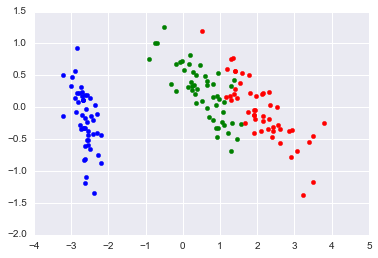

In [74]:
for i in xrange(50):
    plt.scatter(iris_X_prime[i][0], iris_X_prime[i][1], color='blue')
for i in xrange(50, 100):
    plt.scatter(iris_X_prime[i][0], iris_X_prime[i][1], color='green')
for i in xrange(100, 150):
    plt.scatter(iris_X_prime[i][0], iris_X_prime[i][1], color='red')
plt.show() # 降维后，iris数据集仍能够被分为3类

## 指定包含信息比例

In [75]:
pca = decomposition.PCA(n_components=.98) # 指定降维后包含的信息不得少于元数据集的98%
iris_X_prime = pca.fit(iris_X)
pca.explained_variance_ratio_.sum() # 降维到3维，包含了99.48%的原数据集的信息

0.99481691454981014

# 因子分析降维
FactorAnalysis类

In [76]:
from sklearn.decomposition import FactorAnalysis

In [77]:
fa = FactorAnalysis(n_components=2) # 设置提取两个因子
iris_two_dim = fa.fit_transform(iris.data) # 因子分析的使用方法与PCA基本相同
iris_two_dim[:5]

array([[-1.33125848, -0.55846779],
       [-1.33914102,  0.00509715],
       [-1.40258715,  0.307983  ],
       [-1.29839497,  0.71854288],
       [-1.33587575, -0.36533259]])

In [78]:
iris.target[49]

0

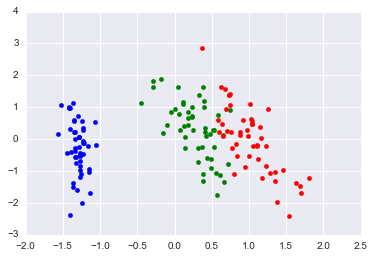

In [79]:
for i in xrange(50):
    plt.scatter(iris_two_dim[i][0], iris_two_dim[i][1], color='blue')
for i in xrange(50, 100):
    plt.scatter(iris_two_dim[i][0], iris_two_dim[i][1], color='green')
for i in xrange(100, 150):
    plt.scatter(iris_two_dim[i][0], iris_two_dim[i][1], color='red')
plt.show() # 降维后，iris数据集仍能够被分为3类

# 核PCA非线性降维
KernelPCA类  
有5种核：poly (polynomial)、rbf (radial basis function)、sigmoid、cosine、precomputed

In [80]:
from sklearn import decomposition

In [81]:
# 假设有A和B两个数据生成过程，生成数据集
import numpy as np
A1_mean = [1, 1]
A1_cov = [[2, .99], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, .99], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack((A1, A2))
B_mean = [5, 0]
B_cov = [[.5, -.1], [-.9, .5]]
B = np.random.multivariate_normal(B_mean, B_cov, 100)

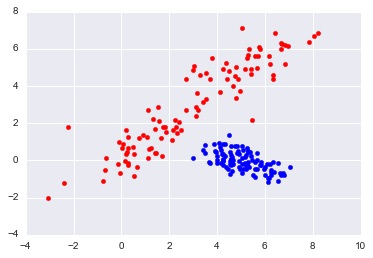

In [82]:
# A和B难以线性分离
for i in xrange(A.shape[0]):
    plt.scatter(A[i][0], A[i][1], color='red')
for i in xrange(B.shape[0]):
    plt.scatter(B[i][0], B[i][1], color='blue')
plt.show()

In [83]:
kpca = decomposition.KernelPCA(kernel='cosine', n_components=1) # 选取cosine核进行PCA降维
AB = np.vstack((A, B))
AB_transformed = kpca.fit_transform(AB)

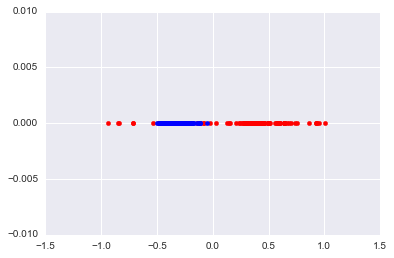

In [84]:
for i in xrange(100):
    plt.scatter(AB_transformed[i], 0, color='red')
for i in xrange(100, 200):
    plt.scatter(AB_transformed[i], 0, color='blue')
plt.show() # 降维后，基本上线性可分

In [85]:
pca = decomposition.PCA(n_components=1) # 进行普通PCA降维，以比较效果
AB = np.vstack((A, B))
AB_transformed = pca.fit_transform(AB)

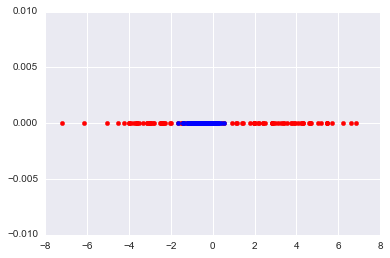

In [86]:
for i in xrange(100):
    plt.scatter(AB_transformed[i], 0, color='red')
for i in xrange(100, 200):
    plt.scatter(AB_transformed[i], 0, color='blue')
plt.show() # 线性不可分，效果比核PCA差

# 截尾SVD降维
TruncatedSVD类  
截尾SVD可以应用于稀疏矩阵，而PCA则不行

In [87]:
from sklearn.decomposition import TruncatedSVD

In [88]:
# 生成数据集
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

In [89]:
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
iris_transformed[:5]

array([[ 5.91220352,  2.3034421 ],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

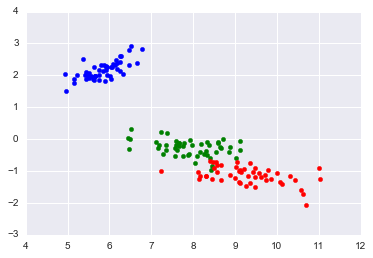

In [90]:
for i in xrange(50):
    plt.scatter(iris_transformed[i][0], iris_transformed[i][1], color='blue')
for i in xrange(50, 100):
    plt.scatter(iris_transformed[i][0], iris_transformed[i][1], color='green')
for i in xrange(100, 150):
    plt.scatter(iris_transformed[i][0], iris_transformed[i][1], color='red')
plt.show() # 降维后，iris数据集仍能够被分为3类

## SVD

In [91]:
from scipy.linalg import svd
D = np.array([[1, 2], [1, 3], [1, 4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [92]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3L, 2L), (2L,), (2L, 2L))

In [93]:
np.dot(U.dot(np.diag(S)), V)

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

## 截尾SVD

In [94]:
new_S = S[0] # 如果想要进行截尾SVD降维，去掉最小的若干个特征值，并去掉U矩阵的对应列；保留t维，则去掉N-t个特征值
new_U = U[:, 0]
new_U.dot(new_S)

array([-2.20719466, -3.16170819, -4.11622173])

## 符号问题
每次进行截尾SVD，可能返回结果的符号不同。所以，为了保持结果的一致性，应当一次性fit TruncatedSVD类，然后使用transform方法进行降维。

In [95]:
tsvd = TruncatedSVD(2)
tsvd.fit(iris_data) # 一次性fit TruncatedSVD类
tsvd.transform(iris_data)[:5] # 之后用transform降维

array([[ 5.91220352,  2.30344211],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

# 字典学习
DictionaryLearning类

+ 简要介绍字典学习  
DictionaryLearning has a background in signal processing and neurology. The idea is that only few features can be active at any given time. Therefore, DictionaryLearning attempts to find a suitable representation for the underlying data, given the constraint that most of the features should be 0.

In [96]:
from sklearn.decomposition import DictionaryLearning

In [97]:
# 准备数据集
from sklearn.datasets import load_iris
iris = load_iris()

In [98]:
dl = DictionaryLearning(n_components=3) # use three components to represent the three species of iris

In [99]:
transformed = dl.fit_transform(iris_data[::2]) # 将一半数据集作为训练集，另一半数据集作为测试集
transformed[:5]

array([[ 0.        ,  6.34476574,  0.        ],
       [ 0.        ,  5.83576461,  0.        ],
       [ 0.        ,  6.32038375,  0.        ],
       [ 0.        ,  5.89318572,  0.        ],
       [ 0.        ,  5.45222715,  0.        ]])

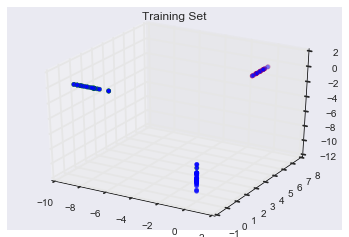

In [100]:
from mpl_toolkits.mplot3d import Axes3D
colors = np.array(['red', 'green', 'blue'])
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Training Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[::2]]); # 训练集被分为3类，有少许错分

In [101]:
transformed = dl.transform(iris_data[1::2]) # 在测试集上测试分类效果

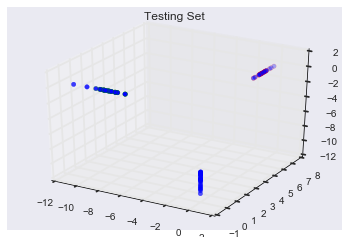

In [102]:
from mpl_toolkits.mplot3d import Axes3D
colors = np.array(list('rgb'))
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Testing Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[1::2]]); # 测试集依然被分为3类，有少许错分

# 高阶Pipelines
Pipeline类

In [103]:
from sklearn import pipeline, preprocessing, decomposition

In [104]:
# 准备包含缺失值的数据集
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris_data = iris.data
mask = np.random.binomial(1, .25, iris_data.shape).astype(bool)
iris_data[mask] = np.nan
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  nan],
       [ 4.6,  nan,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [105]:
# 创建PCA类和Imputer类
pca = decomposition.PCA()
imputer = preprocessing.Imputer()

In [106]:
# 将PCA类和Imputer类载入到Pipeline类中
pipe = pipeline.Pipeline([('imputer', imputer), ('pca', pca)]) # 元组的列表，元组的第一个元素是步骤名称，第二个元素是步骤引用的对象
iris_data_transformed = pipe.fit_transform(iris_data)
iris_data_transformed[:5]

array([[-2.69892714, -0.22456164,  0.2779381 , -0.0933734 ],
       [-2.73367951,  0.06667562,  0.03599322,  0.28798707],
       [-2.61375002, -0.04719411, -0.78248054, -0.2907163 ],
       [-2.75408613,  0.35000839,  0.02476551,  0.1351247 ],
       [-2.74070229, -0.16172095,  0.29761856, -0.21135036]])

## make_pipeline方法

In [107]:
pipe2 = pipeline.make_pipeline(imputer, pca)
pipe2.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
 ('pca', PCA(copy=True, n_components=None, whiten=False))]

In [108]:
iris_data_transformed2 = pipe2.fit_transform(iris_data)
iris_data_transformed2[:5]

array([[-2.69892714, -0.22456164,  0.2779381 , -0.0933734 ],
       [-2.73367951,  0.06667562,  0.03599322,  0.28798707],
       [-2.61375002, -0.04719411, -0.78248054, -0.2907163 ],
       [-2.75408613,  0.35000839,  0.02476551,  0.1351247 ],
       [-2.74070229, -0.16172095,  0.29761856, -0.21135036]])

## 修改某一步骤的参数

In [109]:
pipe2.set_params(pca__n_components=2) # 可以用set_params方法修改某一步骤的参数，参数形式为<parameter's_name>__<parameter's_parameter>（两个下划线！！！）

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('pca', PCA(copy=True, n_components=2, whiten=False))])

In [110]:
iris_data_transformed3 = pipe2.fit_transform(iris_data)
iris_data_transformed3[:5] # 起到了降维的作用

array([[-2.69892714, -0.22456164],
       [-2.73367951,  0.06667562],
       [-2.61375002, -0.04719411],
       [-2.75408613,  0.35000839],
       [-2.74070229, -0.16172095]])

# 用高斯过程进行回归
GaussianProcess类

In [111]:
from sklearn.gaussian_process import GaussianProcess

In [112]:
# 准备数据集
from sklearn.datasets import load_boston
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
train_set = np.random.choice([True, False], len(boston_y), p=[.75, .25]) # 取75%的数据为训练集

In [113]:
gp = GaussianProcess()
gp.fit(boston_X[train_set], boston_y[train_set]) # 训练模型

GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x000000000CA07E48>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x0000000004502C18>,
        regr=<function constant at 0x000000000CB7E6D8>,
        storage_mode='full', theta0=array([[ 0.1]]), thetaL=None,
        thetaU=None, verbose=False)

In [114]:
test_preds = gp.predict(boston_X[~train_set]) # 在测试集上测试模型效果

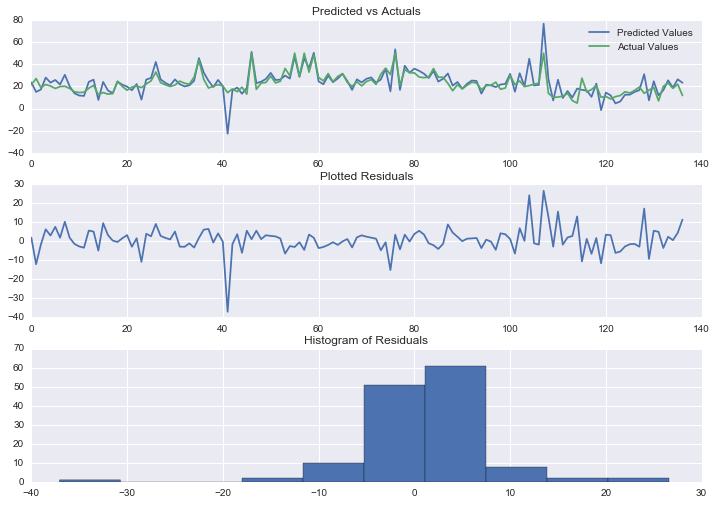

In [115]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(test_preds)), test_preds, label='Predicted Values'); # 真实值与预测值的对比
ax[0].plot(range(len(test_preds)), boston_y[~train_set], label='Actual Values');
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')

ax[1].plot(range(len(test_preds)), test_preds - boston_y[~train_set]); # 残差图
ax[1].set_title("Plotted Residuals")

ax[2].hist(test_preds - boston_y[~train_set]); # 残差的分布直方图
ax[2].set_title("Histogram of Residuals");

## 参数

+ beta0: This is the regression weight. This defaults in a way such that MLE is used for estimation.
+ theta0: This represents the starting point in the estimation of the the parameters.
+ corr: This is the correlation function. There are several built-in correlation functions.
    + absolute_exponential
    + squared_exponential
    + generalized_exponential
    + cubic
    + linear
+ regr: This is the constant regression function.
+ nugget: This is the regularization parameter. It defaults to a very small number. You can either pass one value to be used for each data point or a single value that needs to be applied uniformly.
+ normalize: This defaults to True, and it will center and scale the features. This would be scale is R.

In [116]:
gp = GaussianProcess(regr='linear', theta0=5e-1) # 尝试不同的regr和theta0参数
gp.fit(boston_X[train_set], boston_y[train_set]);
linear_preds = gp.predict(boston_X[~train_set])

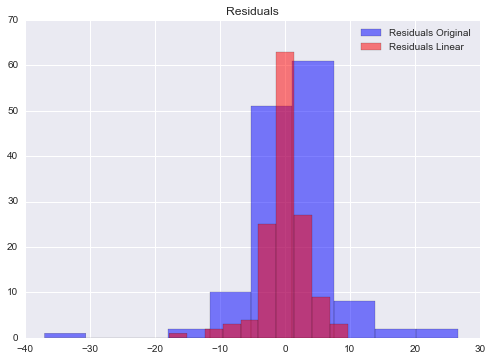

In [117]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(test_preds - boston_y[~train_set], label='Residuals Original', color='b', alpha=.5);
ax.hist(linear_preds - boston_y[~train_set], label='Residuals Linear', color='r', alpha=.5);
ax.set_title("Residuals")
ax.legend(loc='best');

## 均方误差MSE

In [118]:
np.power(test_preds - boston_y[~train_set], 2).mean(), np.power(linear_preds - boston_y[~train_set], 2).mean() # 比较两个模型的MSE

(45.4539973652724, 12.753149735133796)

In [119]:
test_preds, MSE = gp.predict(boston_X[~train_set], eval_MSE=True) # 在predict方法中设置eval_MSE参数为True，可以同时返回测试值、测试集上的MSE
MSE[:5], MSE.mean()

(array([ 15.02815442,   5.15074933,   6.37593092,  25.60620027,   8.98569158]),
 16.823177385460568)

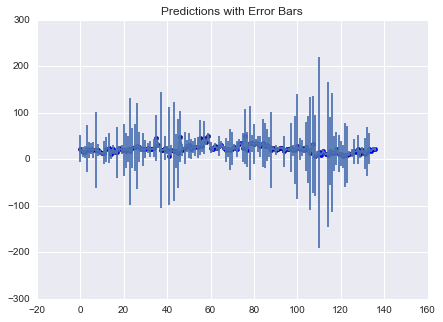

In [120]:
# 绘制预测值及置信区间（误差条）
f, ax = plt.subplots(figsize=(7, 5))
rng = range(len(MSE))
ax.scatter(rng, test_preds)
ax.errorbar(rng, test_preds, yerr=1.96*MSE)
ax.set_title("Predictions with Error Bars");

# 直接设置高斯过程
regression_models方法

In [121]:
from sklearn.gaussian_process import regression_models

In [122]:
# 准备数据集
from sklearn.datasets import make_regression
X, y = make_regression(1000, 1, 1)

In [123]:
regression_models.constant(X)[:5] # First up is the constant correlation function. This will comprise a constant and more for completeness

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [124]:
regression_models.linear(X)[:1] # Another option is the squared exponential correlation function. This is also the default for the GaussianProcess class

array([[ 1.       ,  0.7300823]])

In [125]:
regression_models.quadratic(X)[:1]

array([[ 1.        ,  0.7300823 ,  0.53302016]])

Now that we have the regression function, we can feed it directly into the GaussianProcess object. The default is the constant regression function, but we can just as easily pass it in a linear model or a quadratic model.

# 回归问题中的随机梯度下降
SGDRegressor类

In [126]:
from sklearn import linear_model

In [127]:
# 创建一个大数据集
from sklearn import datasets
X, y = datasets.make_regression(int(1e6))
X.shape, y.shape # 100万个样本，100个特征

((1000000L, 100L), (1000000L,))

In [128]:
print "{:,}".format(X.nbytes) # X数据集占用了8亿字节内存

800,000,000


In [129]:
X.nbytes / 1e6 # X数据集占用了800MB内存

800.0

In [130]:
X.nbytes / (X.shape[0]*X.shape[1]) # 每个数据点占用了8字节内存（有100个特征，每个样本包含100个数据点）

8L

In [131]:
sgd = linear_model.SGDRegressor()
train = np.random.choice([True, False], size=len(y), p=[.75, .25]) # 选取75%数据为训练集
sgd.fit(X[train], y[train])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

参数
+ loss: Squared_loss, which is the same thing that occurs during linear regression.
+ fit_intercept: Scikit-learn will automatically include a column of ones.
+ shuffle: Shuffle will generate a random shuffle of the data. This is useful if you want to break a potentially spurious correlation.
+ verbose: If you like to see more through the output of the fitting, set verbose to 1.

In [132]:
test_preds = sgd.predict(X[~train]) # 在测试集上测试模型效果

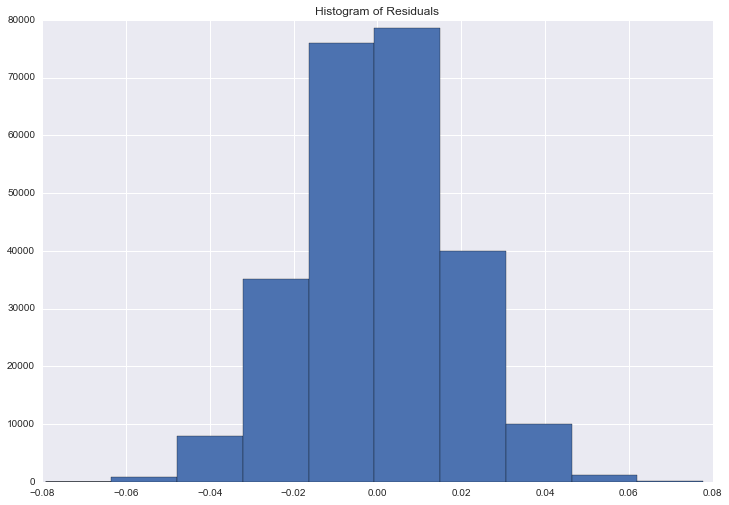

In [133]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 7), nrows=1)
f.tight_layout()

ax.hist(test_preds - y[~train]); # 残差的分布直方图
ax.set_title("Histogram of Residuals"); # 拟合效果不错